In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
maldf = pd.read_csv("malware-multiclass-results.csv")
print('size of malware results', len(maldf))

size of malware results 55440


In [3]:
maldf.columns

Index(['dimred', 'modeltype', 'accuracy', 'precision', 'recall', 'f1', 'mcc'], dtype='object')

In [4]:
maldf = maldf[~(maldf['modeltype']=='svm_poly')]
maldf = maldf[~(maldf['modeltype']=='nn_1')]
maldf = maldf[~(maldf['modeltype']=='nn_3')]
maldf = maldf[~(maldf['modeltype']=='nn_5')]
maldf = maldf[~(maldf.modeltype.str.contains('dtree'))]
maldf = maldf[~(maldf.dimred.str.contains('autoencoder') & maldf.dimred.str.contains('pca'))]
maldf = maldf.drop(['precision', 'recall'], axis=1)

In [5]:
maldf.iloc[maldf['accuracy'].idxmax()]

dimred       autoencoder_100_2
modeltype             bayesian
accuracy              0.676173
f1                    0.641088
mcc                   0.607252
Name: 70, dtype: object

In [6]:
maldf.sort_values('accuracy').tail(10)

,dimred,modeltype,accuracy,f1,mcc
4482,autoencoder_500_13,svm_rbf,0.966881,0.967123,0.959862
4342,autoencoder_500_11,svm_rbf,0.966881,0.965648,0.959864
3642,autoencoder_400_14,svm_rbf,0.966881,0.967064,0.959883
1682,autoencoder_200_12,svm_rbf,0.966881,0.967041,0.959871
772,autoencoder_100_12,svm_rbf,0.967801,0.968051,0.961027
3502,autoencoder_400_12,svm_rbf,0.968261,0.968434,0.961573
2732,autoencoder_300_14,svm_rbf,0.968721,0.968856,0.962124
2662,autoencoder_300_13,svm_rbf,0.968721,0.968924,0.962157
3572,autoencoder_400_13,svm_rbf,0.970101,0.970301,0.963812
2,none,svm_rbf,0.978381,0.978586,0.973872


# Autoencoder variable tuning

In [7]:
autos = maldf[maldf['dimred'].str.contains('autoencoder')]
print('number of autoencoded', len(autos))
[~(maldf[maldf['dimred'].str.contains('autoencoder')].dimred.str.extract(r'pca_with_varthresh_([^_]*)_').replace(np.NaN, 'None') != 'None')]

number of autoencoded 130


[         0
 70    True
 72    True
 140   True
 142   True
 210   True
 ...    ...
 4412  True
 4480  True
 4482  True
 4550  True
 4552  True
 
 [130 rows x 1 columns]]

In [8]:
autos['epochs'] = autos.dimred.str.extract(r'autoencoder_(\d*)')
autos['pca'] = autos.dimred.str.extract(r'pca_with_varthresh_([^_]*)_')
autos = autos.replace(np.NaN, 'None')
autos['latdim'] = autos.dimred.str.extract(r'autoencoder_\d*_(\d*)').infer_objects()

/tmp/ipykernel_207062/2904974846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autos['epochs'] = autos.dimred.str.extract(r'autoencoder_(\d*)')
/tmp/ipykernel_207062/2904974846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autos['pca'] = autos.dimred.str.extract(r'pca_with_varthresh_([^_]*)_')


In [9]:
amelt = autos.melt(id_vars=['dimred', 'epochs', 'modeltype', 'latdim', 'pca'],
                   var_name='metric', value_name='value')
amelt['epochs'] = pd.to_numeric(amelt['epochs'])
amelt['value'] = pd.to_numeric(amelt['value'])
amelt['latdim'] = pd.to_numeric(amelt['latdim'])

bayesian
svm


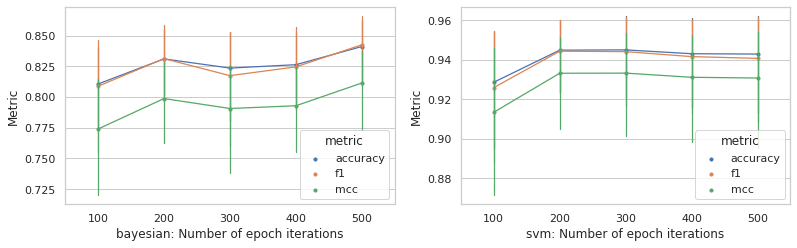

In [10]:

fig = plt.figure(figsize=(13,8))
sns.set(style="whitegrid", rc={"lines.linewidth": 0.7})
modtype = ['bayesian', 'svm']
for i in range(2):
    mod = modtype[i]
    print(mod)
    ax = fig.add_subplot(2, 2, i + 1)
    sns.pointplot(data=amelt[amelt['modeltype'].str.contains(mod)],
                  x='epochs',
                  y='value',
                  hue='metric',
                  ax=ax)
    ax.set(xlabel=mod + ': Number of epoch iterations', ylabel='Metric')

In [11]:
autos = maldf[maldf['dimred'].str.contains('autoencoder')]
print('number of autoencoded', len(autos))
autos['epochs'] = autos.dimred.str.extract(r'autoencoder_(\d*)')
autos['pca'] = autos.dimred.str.extract(r'pca_with_varthresh_([^_]*)_')
autos = autos.replace(np.NaN, 'None')
autos['latdim'] = autos.dimred.str.extract(r'autoencoder_\d*_(\d*)').infer_objects()

number of autoencoded 130


/tmp/ipykernel_207062/1903945312.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autos['epochs'] = autos.dimred.str.extract(r'autoencoder_(\d*)')
/tmp/ipykernel_207062/1903945312.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autos['pca'] = autos.dimred.str.extract(r'pca_with_varthresh_([^_]*)_')


In [12]:
autos['epochs'] = autos.dimred.str.extract(r'autoencoder_(\d*)')
autos['pca'] = autos.dimred.str.extract(r'pca_with_varthresh_([^_]*)_')
autos = autos.replace(np.NaN, 'None')
autos['latdim'] = autos.dimred.str.extract(r'autoencoder_\d*_(\d*)').infer_objects()
amelt = autos.melt(id_vars=['dimred', 'epochs', 'modeltype', 'latdim', 'pca'],
                   var_name='metric', value_name='value')
amelt['epochs'] = pd.to_numeric(amelt['epochs'])
amelt['value'] = pd.to_numeric(amelt['value'])
amelt['latdim'] = pd.to_numeric(amelt['latdim'])


bayesian
svm


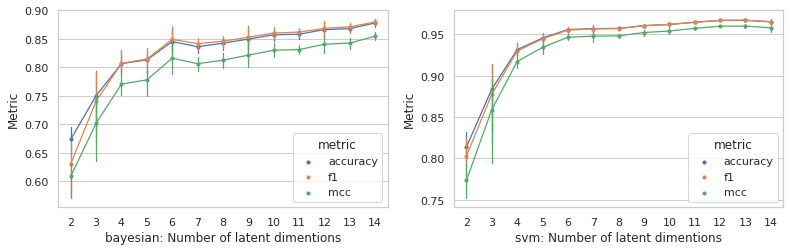

In [13]:
fig = plt.figure(figsize=(13,8))
sns.set(style="whitegrid", rc={"lines.linewidth": 0.7})
modtype = ['bayesian','svm']
for i in range(2):
    mod = modtype[i]
    print(mod)
    ax = fig.add_subplot(2, 2, i + 1)
    sns.pointplot(data=amelt[amelt['modeltype'].str.contains(mod)],
                  x='latdim',
                  y='value',
                  hue='metric',
                  ax=ax)
    ax.set(xlabel=mod + ': Number of latent dimentions', ylabel='Metric')

fig = plt.figure(figsize=(24,16))
sns.set(style="whitegrid", rc={"lines.linewidth": 0.7})
modtype = ['bayesian', 'svm']
for i in range(3):
    mod = modtype[i]
    print(mod)
    ax = fig.add_subplot(2, 2, i + 1)
    sns.pointplot(data=amelt[amelt['modeltype'].str.contains(mod)],
                  x='pca',
                  y='value',
                  hue='metric',
                  ax=ax)
    ax.set(xlabel=mod + ': PCA threshold', ylabel='Metric')

## PCA

In [14]:
pcas = maldf[maldf.dimred.str.match(r'pca_with_varthresh_[^_]*$')]
print('number of pcad', len(pcas))
pcas['pca'] = pcas.dimred.str.extract(r'pca_with_varthresh_([^_]*)')

pmelt = pcas.melt(id_vars=['dimred', 'modeltype', 'pca'],
                   var_name='metric', value_name='value')


number of pcad 22


/tmp/ipykernel_207062/1577152530.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcas['pca'] = pcas.dimred.str.extract(r'pca_with_varthresh_([^_]*)')


bayesian
svm


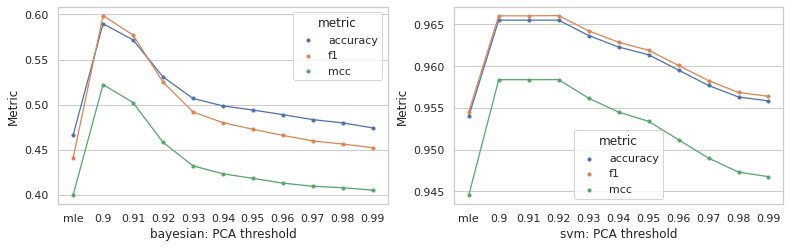

In [15]:

fig = plt.figure(figsize=(13,8))
sns.set(style="whitegrid", rc={"lines.linewidth": 0.7})
modtype = ['bayesian','svm']
for i in range(2):
    mod = modtype[i]
    print(mod)
    ax = fig.add_subplot(2, 2, i + 1)
    sns.pointplot(data=pmelt[pmelt['modeltype'].str.contains(mod)],
                  x='pca',
                  y='value',
                  hue='metric',
                  ax=ax)
    ax.set(xlabel=mod + ': PCA threshold', ylabel='Metric')


# ML metric comparison

## Baysian Network

In [16]:
bayes = maldf[maldf['modeltype'].str.contains('bayesian')]
bayes['drtype'] = bayes['dimred']\
    .replace(regex=r'autoencoder.*', value='autoencoder')\
    .replace(regex=r'pca_with_varthresh_[^_]*', value='pca')\
    .replace(regex=r'pca_with_mle', value='pca')
bayes

/tmp/ipykernel_207062/1871819487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bayes['drtype'] = bayes['dimred']\


,dimred,modeltype,accuracy,f1,mcc,drtype
0,none,bayesian,0.760350,0.790289,0.721719,none
70,autoencoder_100_2,bayesian,0.676173,0.641088,0.607252,autoencoder
140,autoencoder_100_3,bayesian,0.650414,0.614272,0.580609,autoencoder
210,autoencoder_100_4,bayesian,0.786569,0.788731,0.745086,autoencoder
280,autoencoder_100_5,bayesian,0.815547,0.821936,0.781609,autoencoder
...,...,...,...,...,...,...
32340,pca_with_varthresh_0.95,bayesian,0.494020,0.472698,0.418324,pca
36960,pca_with_varthresh_0.96,bayesian,0.488960,0.465993,0.413029,pca
41580,pca_with_varthresh_0.97,bayesian,0.483441,0.459836,0.409563,pca
46200,pca_with_varthresh_0.98,bayesian,0.479761,0.456324,0.407977,pca


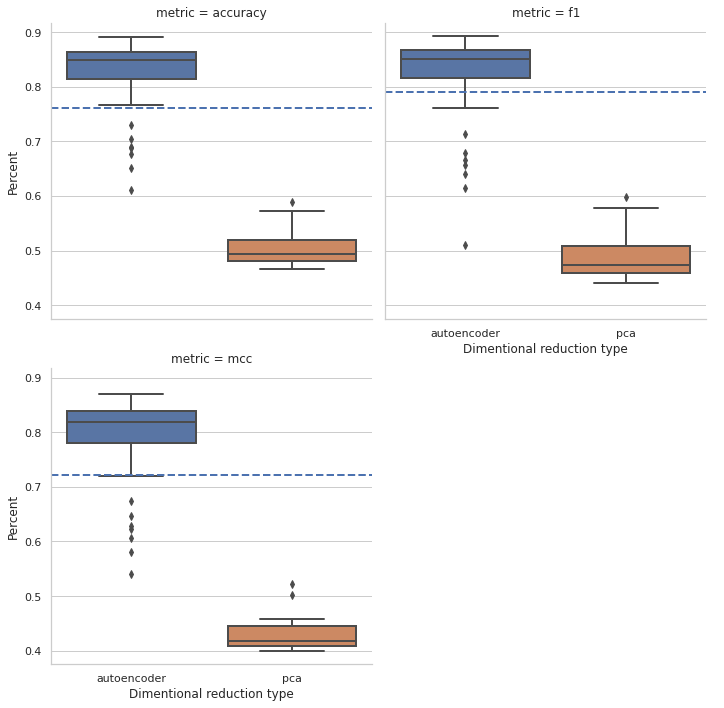

In [17]:
baymelt = bayes[bayes.drtype != 'none'].melt(id_vars=['dimred', 'modeltype', 'drtype'],
                     var_name='metric', value_name='value')
baymelt['value'] = pd.to_numeric(baymelt['value'])
sns.set(style="whitegrid", rc={"lines.linewidth": 2})

ax = sns.catplot(data=baymelt,x='drtype', y='value', col='metric', col_wrap=2,
           kind='box')

base = bayes[bayes.drtype == 'none']
for a in ax.axes:
    b = base[(a.title.get_text().split(' = ')[1])].loc[0]
    a.axhline(b, ls='--')
    a.set(xlabel='Dimentional reduction type', ylabel='Percent')
#ax.axhline(baseacc)
#ax.set(xlabel='Dimentional recduction type', ylabel='Percent')

ax.add_legend()


In [18]:
bayes[bayes.groupby('drtype', sort=False)['accuracy'].transform(max) == bayes['accuracy']]

,dimred,modeltype,accuracy,f1,mcc,drtype
0,none,bayesian,0.760350,0.790289,0.721719,none
2590,autoencoder_300_12,bayesian,0.891904,0.892821,0.870143,autoencoder
9240,pca_with_varthresh_0.9,bayesian,0.589696,0.598669,0.522298,pca


In [19]:
bayes.groupby('drtype').mean()

,accuracy,f1,mcc
drtype,,,
autoencoder,0.826474,0.824842,0.793444
none,0.760350,0.790289,0.721719
pca,0.507652,0.492787,0.435660


In [20]:
bayes.groupby('drtype', sort=False).max()

,dimred,modeltype,accuracy,f1,mcc
drtype,,,,,
none,none,bayesian,0.760350,0.790289,0.721719
autoencoder,autoencoder_500_9,bayesian,0.891904,0.892821,0.870143
pca,pca_with_varthresh_mle,bayesian,0.589696,0.598669,0.522298


In [21]:
def calc_diff(x,met):
    samemodel = bayes['modeltype']==x['modeltype']
    basemet = bayes[samemodel & (bayes['dimred'] == 'none')][met].iloc[0]
    return x[met] - basemet

for met in  ['accuracy', 'f1', 'mcc']:
    print(met)
    bayes[met + '_diff'] = bayes.apply(lambda x: calc_diff(x, met), axis=1)

accuracy
f1
mcc


/tmp/ipykernel_207062/1103262962.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bayes[met + '_diff'] = bayes.apply(lambda x: calc_diff(x, met), axis=1)


In [22]:
agg = pd.DataFrame()
for met in  ['accuracy', 'f1', 'mcc']:
    agg = agg.append(bayes[['drtype', 'dimred', met + '_diff']].groupby('drtype').mean().T)

agg

drtype,autoencoder,none,pca
accuracy_diff,0.066124,0.0,-0.252697
f1_diff,0.034552,0.0,-0.297502
mcc_diff,0.071725,0.0,-0.286058


In [23]:
for met in  ['accuracy', 'f1', 'mcc']:
    print(bayes[['drtype', 'dimred', met + '_diff']].groupby('drtype').max())

                             dimred  accuracy_diff
drtype                                            
autoencoder       autoencoder_500_9       0.131555
none                           none       0.000000
pca          pca_with_varthresh_mle      -0.170653
                             dimred   f1_diff
drtype                                       
autoencoder       autoencoder_500_9  0.102531
none                           none  0.000000
pca          pca_with_varthresh_mle -0.191620
                             dimred  mcc_diff
drtype                                       
autoencoder       autoencoder_500_9  0.148424
none                           none  0.000000
pca          pca_with_varthresh_mle -0.199421


### SVM_RBF

In [24]:
svms = maldf[maldf['modeltype'].str.contains('svm_rbf')]
svms['drtype'] = svms['dimred']\
    .replace(regex=r'autoencoder.*', value='autoencoder')\
    .replace(regex=r'pca_with_varthresh_[^_]*', value='pca')\
    .replace(regex=r'pca_with_mle', value='pca')
print(svms)

/tmp/ipykernel_207062/3986701597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svms['drtype'] = svms['dimred']\


                        dimred modeltype  accuracy        f1       mcc  \
2                         none   svm_rbf  0.978381  0.978586  0.973872   
72           autoencoder_100_2   svm_rbf  0.819687  0.812460  0.780513   
142          autoencoder_100_3   svm_rbf  0.779209  0.755093  0.730894   
212          autoencoder_100_4   svm_rbf  0.920423  0.919481  0.904198   
282          autoencoder_100_5   svm_rbf  0.937443  0.936863  0.924396   
...                        ...       ...       ...       ...       ...   
32342  pca_with_varthresh_0.95   svm_rbf  0.961362  0.961893  0.953394   
36962  pca_with_varthresh_0.96   svm_rbf  0.959522  0.960079  0.951189   
41582  pca_with_varthresh_0.97   svm_rbf  0.957682  0.958264  0.948993   
46202  pca_with_varthresh_0.98   svm_rbf  0.956302  0.956847  0.947315   
50822  pca_with_varthresh_0.99   svm_rbf  0.955842  0.956390  0.946771   

            drtype  
2             none  
72     autoencoder  
142    autoencoder  
212    autoencoder  
282   

accuracy
f1
mcc


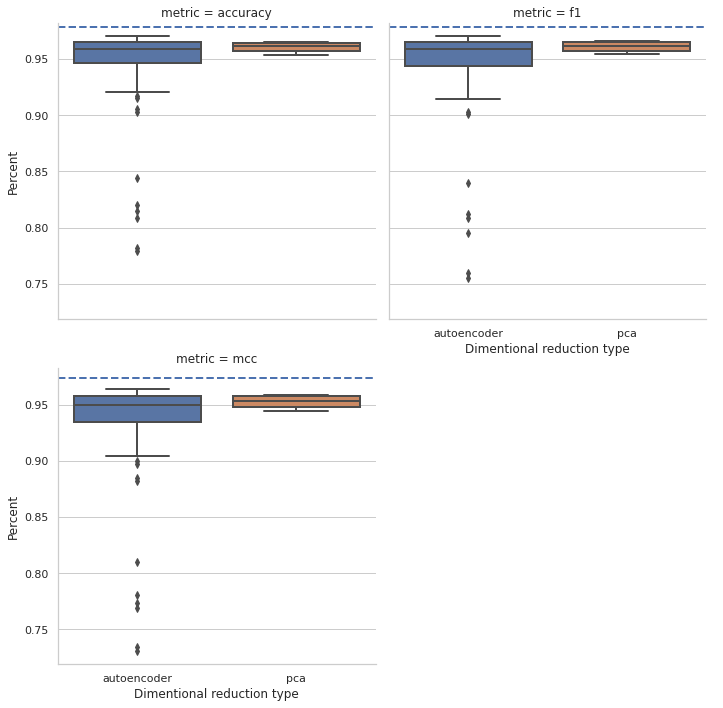

In [25]:
svmmelt = svms[svms.drtype != 'none'].melt(id_vars=['dimred', 'modeltype', 'drtype'],
                     var_name='metric', value_name='value')
svmmelt['value'] = pd.to_numeric(svmmelt['value'])
sns.set(style="whitegrid", rc={"lines.linewidth": 2})

ax = sns.catplot(data=svmmelt,x='drtype', y='value', col='metric', col_wrap=2,
           kind='box')

base = svms[svms.drtype == 'none']
for a in ax.axes:
    print(a.title.get_text().split(' = ')[1])
    b = base[a.title.get_text().split(' = ')[1]].iloc[0]
    a.axhline(b, ls='--')
    a.set(xlabel='Dimentional reduction type', ylabel='Percent')
#ax.axhline(baseacc)
#ax.set(xlabel='Dimentional recduction type', ylabel='Percent')

ax.add_legend()


In [26]:
svms.groupby('drtype').mean()

,accuracy,f1,mcc
drtype,,,
autoencoder,0.940924,0.939366,0.928363
none,0.978381,0.978586,0.973872
pca,0.960651,0.961194,0.952544


In [27]:
svms[svms.groupby('drtype', sort=False)['mcc'].transform(max) == svms['mcc']]

,dimred,modeltype,accuracy,f1,mcc,drtype
2,none,svm_rbf,0.978381,0.978586,0.973872,none
3572,autoencoder_400_13,svm_rbf,0.970101,0.970301,0.963812,autoencoder
18482,pca_with_varthresh_0.92,svm_rbf,0.965501,0.966044,0.958378,pca


In [28]:
def calc_diff(x,met):
    samemodel = svms['modeltype']==x['modeltype']
    basemet = svms[samemodel & (svms['dimred'] == 'none')][met].iloc[0]
    return x[met] - basemet

for met in  ['accuracy', 'f1', 'mcc']:
    print(met)
    svms[met + '_diff'] = svms.apply(lambda x: calc_diff(x, met), axis=1)

accuracy
f1
mcc


/tmp/ipykernel_207062/2802363335.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svms[met + '_diff'] = svms.apply(lambda x: calc_diff(x, met), axis=1)


In [29]:
agg = pd.DataFrame()
for met in  ['accuracy', 'f1', 'mcc']:
    agg = agg.append(svms[['drtype', 'dimred', met + '_diff']].groupby('drtype').mean().T)

agg

drtype,autoencoder,none,pca
accuracy_diff,-0.037457,0.0,-0.017730
f1_diff,-0.039220,0.0,-0.017392
mcc_diff,-0.045509,0.0,-0.021328


## DTs

### variable tuning

dtrees = maldf[maldf['modeltype'].str.contains('dtree')]
dtrees['drtype'] = dtrees['dimred']\
    .replace(regex=r'autoencoder.*', value='autoencoder')\
    .replace(regex=r'pca_with_varthresh_[^_]*', value='pca')\
    .replace(regex=r'pca_with_mle', value='pca')
dtrees['criterion'] = dtrees.modeltype.str.extract(r'dtree_([^_]*)_')
dtrees['splitter'] = dtrees.modeltype.str.extract(r'dtree_[^_]*_([^_]*)_')
dtrees['min_samples_split'] = dtrees.modeltype.str.extract(r'dtree_[^_]*_[^_]*_([^_]*)_')
dtrees['min_samples_leaf'] = dtrees.modeltype.str.extract(r'dtree_[^_]*_[^_]*_[^_]*_([^_]*)')

print(dtrees)

ax = plt.figure(figsize=(13,8))
sns.boxenplot(data=dtrees, x='criterion', y='mcc', hue='splitter')

dtrees[dtrees.groupby(['criterion', 'splitter'])['mcc'].transform(max) == dtrees['mcc']][['criterion', 'splitter', 'dimred', 'modeltype', 'accuracy', 'f1', 'mcc']]

dtrees.groupby(['criterion', 'splitter']).mean()

dtrees.groupby(['criterion', 'splitter']).max()

dtrees.groupby('drtype').mean()

dtrees.groupby('drtype', sort=False).max()

dtrees.groupby(['min_samples_split', 'min_samples_leaf']).mean()

dtrees.groupby(['min_samples_split', 'min_samples_leaf']).max()

for met in  ['accuracy', 'f1', 'mcc']:
    print(dtrees[dtrees[met] == dtrees[met].max()])

def calc_diff(x,met):
    samemodel = dtrees['modeltype']==x['modeltype']
    basemet = dtrees[samemodel & (dtrees['dimred'] == 'none')][met].iloc[0]
    return x[met] - basemet
for met in  ['accuracy', 'f1', 'mcc']:
    print(met)
    dtrees[met + '_diff'] = dtrees.apply(lambda x: calc_diff(x, met), axis=1)

fig = plt.figure(figsize=(20,13))

sns.set(style="whitegrid", rc={"lines.linewidth": 0.7})
for i in range(3):
    met = ['accuracy_diff', 'f1_diff', 'mcc_diff'][i]
    ax = fig.add_subplot(2, 3, i + 1)
    sns.boxplot(data=dtrees[dtrees['drtype'] != 'none'], x='drtype', y=met)
    ax.set(xlabel='Dimention Reduction Technique')
    

agg = pd.DataFrame()
for met in  ['accuracy','f1', 'mcc']:
    agg = agg.append(dtrees[dtrees[met] == dtrees[met].max()])

agg

# Neural Nets

nns = maldf[maldf['modeltype'].str.contains('nn')]
nns['drtype'] = nns['dimred']\
    .replace(regex=r'autoencoder.*', value='autoencoder')\
    .replace(regex=r'pca_with_varthresh_[^_]*', value='pca')\
    .replace(regex=r'pca_with_mle', value='pca')
nns['layers'] = nns.modeltype.str.extract(r'nn_([^_]*)')

print(nns)

nnmelt = nns[nns.drtype == 'none'].melt(id_vars=['dimred', 'modeltype', 'drtype', 'layers'],
                     var_name='metric', value_name='value')
nnmelt['value'] = pd.to_numeric(nnmelt['value'])

sns.set(style="whitegrid", rc={"lines.linewidth": 0.7})
ax = sns.catplot(data=nnmelt,
                 x='layers',
                 y='value',
                 hue='metric',
                 kind='point',
                 aspect=13/8,
                 height= 6,
                 linestyles='--',
                 linewidth=0.5)

ax.set(xlabel='Number of hidden layers', ylabel='Percent')

nns[nns.drtype == 'none'].groupby('layers').mean()

nns[nns['accuracy'] == nns['accuracy'].max()]

def calc_diff(x,met):
    samemodel = nns['modeltype']==x['modeltype']
    basemet = nns[samemodel & (nns['dimred'] == 'none')][met].iloc[0]
    return x[met] - basemet

for met in  ['accuracy', 'precision', 'recall', 'f1', 'mcc']:
    print(met)
    nns[met + '_diff'] = nns.apply(lambda x: calc_diff(x, met), axis=1)

fig = plt.figure(figsize=(20,13))
for i in range(5):
    met = ['accuracy_diff', 'precision_diff', 'recall_diff', 'f1_diff', 'mcc_diff'][i]
    ax = fig.add_subplot(2, 3, i + 1)
    sns.boxplot(data=nns[nns['drtype'] != 'none'], x='drtype', y=met)
    ax.set(xlabel='Dimention Reduction Technique')
    